   # Title

In [33]:
import pandas as pd
import numpy as np
import os 
from sqlalchemy import create_engine
from sqlalchemy import true
from sqlalchemy.inspection import inspect
from config import username, password, host, port, protocol
import matplotlib.pyplot as plt


## Read CSV Files

In [34]:
# Read Global COVID Data CSV Head
WHO_global_data = "WHO-COVID-19-global-table-data1.csv"
WHO_global_data_df = pd.read_csv(WHO_global_data, sep=',')
WHO_global_data_df.head()

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours,Date
0,Global,NaN,570005017,7312.875304,6637125,85.150948,1019583,6384128,81.905125,13148,0.168682,1882,6/29/22
1,United States of America,Americas,89428046,27017.320000,856441,258.741000,117592,1017366,307.359000,2529,0.764000,195,6/29/22
2,India,South-East Asia,43938764,3183.958000,135145,9.793000,18313,526167,38.128000,342,0.025000,57,6/29/22
3,Brazil,Americas,33621965,15817.678000,282150,132.739000,30609,677143,318.566000,1625,0.764000,179,6/29/22
4,France,Europe,32664720,50223.004000,454372,698.611000,87562,148254,227.945000,687,1.056000,119,6/29/22


In [35]:
# Read Timeline CSV Head
timeline = "global_covid_timeline.csv"
timeline_df = pd.read_csv(timeline)
timeline_df.head()

,Country,Date,Confirmed Cases,Confirmed Deaths,Population
0,Afghanistan,1/1/22,158107,7356,38928341.0
1,Albania,1/1/22,210224,3217,2877800.0
2,Algeria,1/1/22,218818,6284,43851043.0
3,American Samoa,1/1/22,11,0,55197.0
4,Andorra,1/1/22,23740,140,77265.0


## Transform DataFrames 

In [36]:
# Selecting only columns needed
WHO_global_data_df_cols = ["Name", "WHO Region", "Cases - cumulative total", "Cases - newly reported in last 7 days", "Cases - newly reported in last 24 hours",
                         "Deaths - cumulative total", "Deaths - newly reported in last 7 days", "Deaths - newly reported in last 24 hours", "Date"]
WHO_global_data_df_transformed = WHO_global_data_df[WHO_global_data_df_cols].copy()


# Rename the column headers
WHO_global_data_df_transformed = WHO_global_data_df_transformed.rename(columns={"Name": "country", 
                                                                            "WHO Region": "region", 
                                                                            "Cases - cumulative total": "total_cases", 
                                                                            "Cases - newly reported in last 7 days": "cases_in_last_7days", 
                                                                            "Cases - newly reported in last 24 hours": "cases_in_last_24hrs",
                                                                            "Deaths - cumulative total": "total_deaths", 
                                                                            "Deaths - newly reported in last 7 days": "deaths_in_last_7days", 
                                                                            "Deaths - newly reported in last 24 hours": "deaths_in_last_24hrs",
                                                                            "Date": "date"})


# Set index
#population_2019_df_transformed.set_index(["year", "country"], inplace=True)

WHO_global_data_df_transformed.head()

,country,region,total_cases,cases_in_last_7days,cases_in_last_24hrs,total_deaths,deaths_in_last_7days,deaths_in_last_24hrs,date
0,Global,NaN,570005017,6637125,1019583,6384128,13148,1882,6/29/22
1,United States of America,Americas,89428046,856441,117592,1017366,2529,195,6/29/22
2,India,South-East Asia,43938764,135145,18313,526167,342,57,6/29/22
3,Brazil,Americas,33621965,282150,30609,677143,1625,179,6/29/22
4,France,Europe,32664720,454372,87562,148254,687,119,6/29/22


In [37]:
#Rename the column headers
timeline_df= timeline_df.rename(columns={"Country": "country", 
                                                                            "Date": "date", 
                                                                            "Confirmed Cases": "confirmed_cases", 
                                                                            "Confirmed Deaths": "confirmed_deaths", 
                                                                            "Population": "population",
})

timeline_df.head()

,country,date,confirmed_cases,confirmed_deaths,population
0,Afghanistan,1/1/22,158107,7356,38928341.0
1,Albania,1/1/22,210224,3217,2877800.0
2,Algeria,1/1/22,218818,6284,43851043.0
3,American Samoa,1/1/22,11,0,55197.0
4,Andorra,1/1/22,23740,140,77265.0


In [38]:
#Filtering Timeline
Timeline_Top_5_covd_df = timeline_df.loc[(timeline_df["date"] == "1/1/22")|
                                             (timeline_df["date"] == "2/1/22") |
                                             (timeline_df["date"] == "3/1/22") |
                                             (timeline_df["date"] == "4/1/22") |
                                             (timeline_df["date"] == "5/1/22") |
                                             (timeline_df["date"] == "6/1/22"), :]
Timeline_Top_5_covd_df.head(5)

,country,date,confirmed_cases,confirmed_deaths,population
0,Afghanistan,1/1/22,158107,7356,38928341.0
1,Albania,1/1/22,210224,3217,2877800.0
2,Algeria,1/1/22,218818,6284,43851043.0
3,American Samoa,1/1/22,11,0,55197.0
4,Andorra,1/1/22,23740,140,77265.0


In [39]:
Timeline_Top_5_covid_df = Timeline_Top_5_covd_df.loc[(Timeline_Top_5_covd_df["country"] == "United States")|
                                             (Timeline_Top_5_covd_df["country"] == "Brazil") |
                                             (Timeline_Top_5_covd_df["country"] == "India") |
                                             (Timeline_Top_5_covd_df["country"] == "Germany") |
                                             (Timeline_Top_5_covd_df["country"] == "France"), :]
Timeline_Top_5_covid_df.head(10)

,country,date,confirmed_cases,confirmed_deaths,population
28,Brazil,1/1/22,22295621,619367,2.125594e+08
73,France,1/1/22,9980940,121311,6.527351e+07
79,Germany,1/1/22,7176814,112109,8.378394e+07
96,India,1/1/22,34889132,481770,1.380004e+09
219,United States,1/1/22,54718452,822661,3.310026e+08
7158,Brazil,2/1/22,25634781,628356,2.125594e+08
7203,France,2/1/22,19112755,128567,6.527351e+07
7209,Germany,2/1/22,9978146,117974,8.378394e+07
7226,India,2/1/22,41630885,497975,1.380004e+09
7349,United States,2/1/22,74913546,888299,3.310026e+08


In [40]:
Timeline_Top_5_deaths_df = Timeline_Top_5_covd_df.loc[(Timeline_Top_5_covd_df["country"] == "United States")|
                                             (Timeline_Top_5_covd_df["country"] == "Brazil") |
                                             (Timeline_Top_5_covd_df["country"] == "India") |
                                             (Timeline_Top_5_covd_df["country"] == "Russia") |
                                             (Timeline_Top_5_covd_df["country"] == "Mexico"), :]
Timeline_Top_5_deaths_df.head(10)

,country,date,confirmed_cases,confirmed_deaths,population
28,Brazil,1/1/22,22295621,619367,2.125594e+08
96,India,1/1/22,34889132,481770,1.380004e+09
134,Mexico,1/1/22,3988916,299525,1.289328e+08
171,Russia,1/1/22,10340011,303496,1.459345e+08
219,United States,1/1/22,54718452,822661,3.310026e+08
7158,Brazil,2/1/22,25634781,628356,2.125594e+08
7226,India,2/1/22,41630885,497975,1.380004e+09
7264,Mexico,2/1/22,4985689,306920,1.289328e+08
7301,Russia,2/1/22,11795059,325321,1.459345e+08
7349,United States,2/1/22,74913546,888299,3.310026e+08


## Create Database Engine

In [41]:
database_name="covid_db"
rds_connection_string = f'{protocol}://{username}:{password}@{host}:{port}/{database_name}'
engine = create_engine(rds_connection_string)
inspector = inspect(engine)

In [42]:
# Confirm tables
inspector.get_table_names()

['global_data', 'timeline_data']

### Use pandas to load DataFrames into database

In [43]:
WHO_global_data_df_transformed.to_sql(name='global_data', con=engine, if_exists='replace', index=True)

In [44]:
timeline_df.to_sql(name='timeline_data', con=engine, if_exists='replace', index=True)

### Confirm data has been added by querying the tables

In [45]:
global_data =pd.read_sql_query("SELECT * FROM global_data", con=engine)
global_data.head()

,index,country,region,total_cases,cases_in_last_7days,cases_in_last_24hrs,total_deaths,deaths_in_last_7days,deaths_in_last_24hrs,date
0,0,Global,None,570005017,6637125,1019583,6384128,13148,1882,6/29/22
1,1,United States of America,Americas,89428046,856441,117592,1017366,2529,195,6/29/22
2,2,India,South-East Asia,43938764,135145,18313,526167,342,57,6/29/22
3,3,Brazil,Americas,33621965,282150,30609,677143,1625,179,6/29/22
4,4,France,Europe,32664720,454372,87562,148254,687,119,6/29/22


In [46]:
timeline_data =pd.read_sql_query("SELECT * FROM timeline_data", con=engine)
timeline_data.head()

,index,country,date,confirmed_cases,confirmed_deaths,population
0,0,Afghanistan,1/1/22,158107,7356,38928341.0
1,1,Albania,1/1/22,210224,3217,2877800.0
2,2,Algeria,1/1/22,218818,6284,43851043.0
3,3,American Samoa,1/1/22,11,0,55197.0
4,4,Andorra,1/1/22,23740,140,77265.0


### Top 5 Countries

##### Top 5 - Confirmed Cases

In [15]:
top_5_cases = global_data.sort_values(by='total_cases', ascending=False).head(6)
top_5_cases

,index,country,region,total_cases,cases_in_last_7days,cases_in_last_24hrs,total_deaths,deaths_in_last_7days,deaths_in_last_24hrs,date
0,0,Global,None,570005017,6637125,1019583,6384128,13148,1882,6/29/22
1,1,United States of America,Americas,89428046,856441,117592,1017366,2529,195,6/29/22
2,2,India,South-East Asia,43938764,135145,18313,526167,342,57,6/29/22
3,3,Brazil,Americas,33621965,282150,30609,677143,1625,179,6/29/22
4,4,France,Europe,32664720,454372,87562,148254,687,119,6/29/22
5,5,Germany,Europe,30598385,542459,85680,143545,146,11,6/29/22


<function matplotlib.pyplot.show(close=None, block=None)>

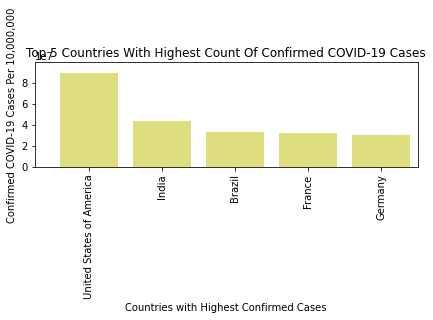

In [16]:
# BAR GRAPH
countries = ["United States of America", "India", "Brazil", "France", "Germany"]
cases = [89428046, 43938764, 33621965, 32664720, 30598385]
x_axis = np.arange(len(cases))

# Create a bar chart based upon the above data
plt.bar(x_axis, cases, color="y", alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, countries, rotation="vertical")

# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-.5)

# Set the limits of the y axis
plt.ylim(0, max(cases)+10000000)

# Give the chart a title, x label, and y label
plt.title("Top 5 Countries With Highest Count Of Confirmed COVID-19 Cases")
plt.xlabel("Countries with Highest Confirmed Cases")
plt.ylabel("Confirmed COVID-19 Cases Per 10,000,000")

plt.tight_layout()
plt.savefig("figures/Top5Cases.png")
plt.show

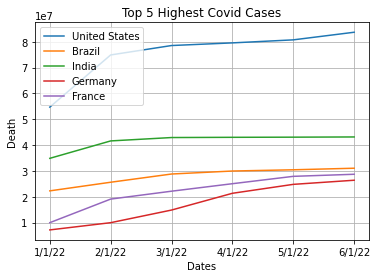

In [47]:
#TIMELINE

# Identify each country
United_States = Timeline_Top_5_covid_df.loc[Timeline_Top_5_covid_df['country'] == 'United States']
Brazil = Timeline_Top_5_covid_df.loc[Timeline_Top_5_covid_df['country'] == 'Brazil']
India = Timeline_Top_5_covid_df.loc[Timeline_Top_5_covid_df['country'] == 'India']
Germany = Timeline_Top_5_covid_df.loc[Timeline_Top_5_covid_df['country'] == 'Germany']
France = Timeline_Top_5_covid_df.loc[Timeline_Top_5_covid_df['country'] == 'France']

# plot lines
United_States, = plt.plot(United_States['date'],United_States['confirmed_cases'], label='United States')
Brazil, = plt.plot(Brazil['date'],Brazil['confirmed_cases'], label='Brazil')
India, = plt.plot(India['date'],India['confirmed_cases'], label='India')
Germany, = plt.plot(Germany['date'],Germany['confirmed_cases'], label='Germany')
France, = plt.plot(France['date'],France['confirmed_cases'], label='France')

# Set our legend to where the chart thinks is best
plt.legend(handles=[United_States, Brazil, India, Germany, France], loc="best")

# Add in a grid for the chart
plt.grid()

# Add labels and title to plot
plt.xlabel("Dates")
plt.ylabel("Death")
plt.title("Top 5 Highest Covid Cases")

# save Chart
plt.savefig("figures/Top_5_Timeline_Cases")

# Display plot
plt.show()

##### Top 5 - Deaths

In [48]:
top_5_deaths = global_data.sort_values(by='total_deaths', ascending=False).head(6)
top_5_deaths

,index,country,region,total_cases,cases_in_last_7days,cases_in_last_24hrs,total_deaths,deaths_in_last_7days,deaths_in_last_24hrs,date
0,0,Global,None,570005017,6637125,1019583,6384128,13148,1882,6/29/22
1,1,United States of America,Americas,89428046,856441,117592,1017366,2529,195,6/29/22
3,3,Brazil,Americas,33621965,282150,30609,677143,1625,179,6/29/22
2,2,India,South-East Asia,43938764,135145,18313,526167,342,57,6/29/22
9,9,Russian Federation,Europe,18554036,49307,9027,382272,275,36,6/29/22
18,18,Mexico,Americas,6628541,79615,4231,327109,216,20,6/29/22


<function matplotlib.pyplot.show(close=None, block=None)>

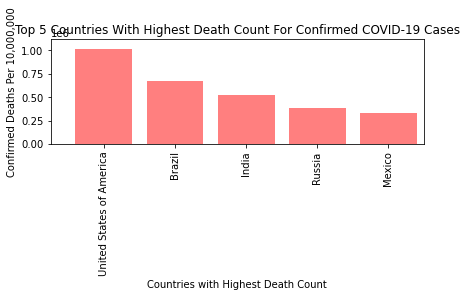

In [49]:
#BAR GRAPH
countries = ["United States of America", "Brazil", "India", "Russia", "Mexico"]
deaths = [1017366, 677143, 526167, 382272, 327109]
x_axis = np.arange(len(deaths))

# Create a bar chart based upon the above data
plt.bar(x_axis, deaths, color="r", alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, countries, rotation="vertical")

# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-.5)

# Set the limits of the y axis
plt.ylim(0, max(deaths)+100000)

# Give the chart a title, x label, and y label
plt.title("Top 5 Countries With Highest Death Count For Confirmed COVID-19 Cases")
plt.xlabel("Countries with Highest Death Count")
plt.ylabel("Confirmed Deaths Per 10,000,000")

plt.tight_layout()
plt.savefig("figures/Top5Deaths.png")
plt.show

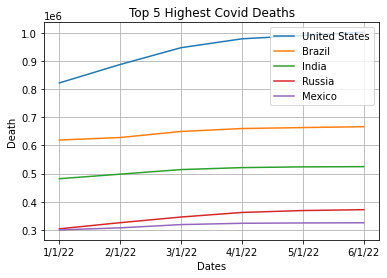

In [50]:
#TIMELINE

# Identify each country
United_States = Timeline_Top_5_deaths_df.loc[Timeline_Top_5_deaths_df['country'] == 'United States']
Brazil = Timeline_Top_5_deaths_df.loc[Timeline_Top_5_deaths_df['country'] == 'Brazil']
India = Timeline_Top_5_deaths_df.loc[Timeline_Top_5_deaths_df['country'] == 'India']
Russia = Timeline_Top_5_deaths_df.loc[Timeline_Top_5_deaths_df['country'] == 'Russia']
Mexico = Timeline_Top_5_deaths_df.loc[Timeline_Top_5_deaths_df['country'] == 'Mexico']

# plot lines
United_States, = plt.plot(United_States['date'],United_States['confirmed_deaths'], label='United States')
Brazil, = plt.plot(Brazil['date'],Brazil['confirmed_deaths'], label='Brazil')
India, = plt.plot(India['date'],India['confirmed_deaths'], label='India')
Russia, = plt.plot(Russia['date'],Russia['confirmed_deaths'], label='Russia')
Mexico, = plt.plot(Mexico['date'],Mexico['confirmed_deaths'], label='Mexico')

# Set our legend to where the chart thinks is best
plt.legend(handles=[United_States, Brazil, India, Russia, Mexico], loc="best")

# Add in a grid for the chart
plt.grid()

# Add labels and title to plot
plt.xlabel("Dates")
plt.ylabel("Death")
plt.title("Top 5 Highest Covid Deaths")



# save Chart
plt.savefig("figures/Top_5_Timeline_Deaths")

# Display plot
plt.show()


### Regions

In [51]:
region_cases = global_data.groupby("region")["total_cases"].sum()
print(region_cases)

region
Africa                     9193438
Americas                 169341537
Eastern Mediterranean     22558094
Europe                   239515129
Other                          764
South-East Asia           59233959
Western Pacific           70162096
Name: total_cases, dtype: int64


In [52]:
region_deaths = global_data.groupby("region")["total_deaths"].sum()
print(region_deaths)

region
Africa                    173963
Americas                 2783762
Eastern Mediterranean     344750
Europe                   2045351
Other                         13
South-East Asia           792027
Western Pacific           244262
Name: total_deaths, dtype: int64


In [53]:
region_df = pd.DataFrame(
    {
    "Total Cases": region_cases,
    "Total Deaths": region_deaths
    }
)
region_df

,Total Cases,Total Deaths
region,,
Africa,9193438,173963
Americas,169341537,2783762
Eastern Mediterranean,22558094,344750
Europe,239515129,2045351
Other,764,13
South-East Asia,59233959,792027
Western Pacific,70162096,244262


In [54]:
region_df.reset_index()

,region,Total Cases,Total Deaths
0,Africa,9193438,173963
1,Americas,169341537,2783762
2,Eastern Mediterranean,22558094,344750
3,Europe,239515129,2045351
4,Other,764,13
5,South-East Asia,59233959,792027
6,Western Pacific,70162096,244262


In [55]:
regions = region_df.sort_values(by='Total Cases', ascending=False)
regions

,Total Cases,Total Deaths
region,,
Europe,239515129,2045351
Americas,169341537,2783762
Western Pacific,70162096,244262
South-East Asia,59233959,792027
Eastern Mediterranean,22558094,344750
Africa,9193438,173963
Other,764,13


<function matplotlib.pyplot.show(close=None, block=None)>

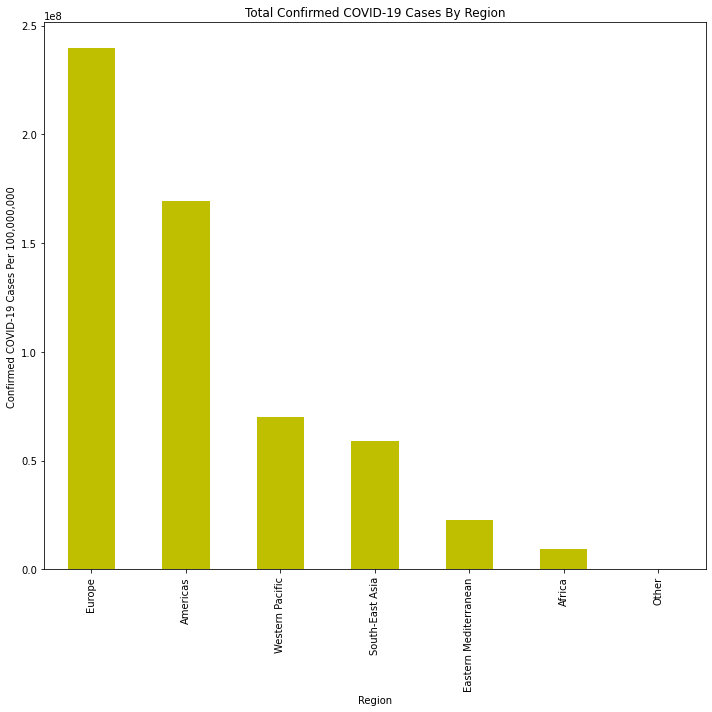

In [56]:
regions["Total Cases"].plot(kind="bar", color="y", figsize=(10,10))
plt.title("Total Confirmed COVID-19 Cases By Region")
# Set x and y limits

plt.xlabel("Region")
plt.ylabel("Confirmed COVID-19 Cases Per 100,000,000")

plt.tight_layout()
plt.savefig("figures/CasesByRegion.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

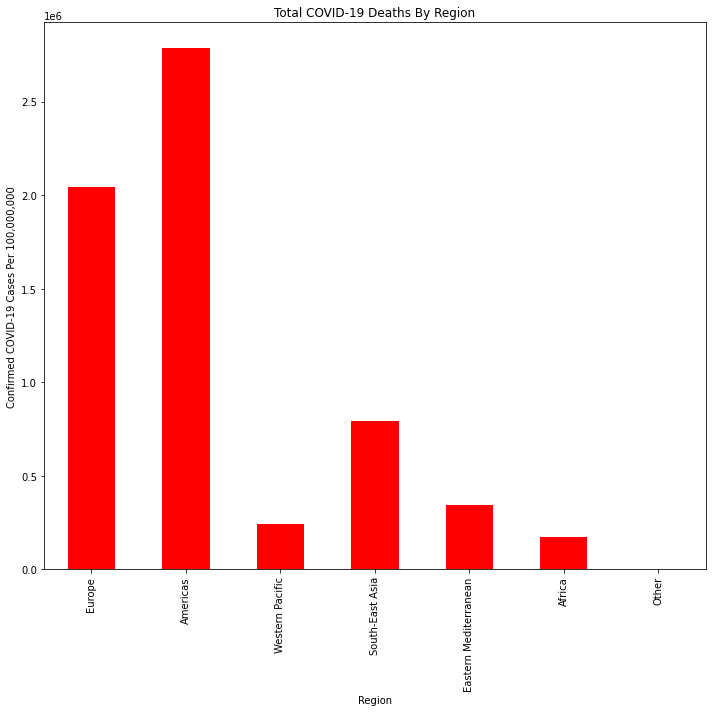

In [57]:
regions["Total Deaths"].plot(kind="bar", color="r", figsize=(10,10))
plt.title("Total COVID-19 Deaths By Region")
# Set x and y limits

plt.xlabel("Region")
plt.ylabel("Confirmed COVID-19 Cases Per 100,000,000")

plt.tight_layout()
plt.savefig("figures/DeathsByRegion.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

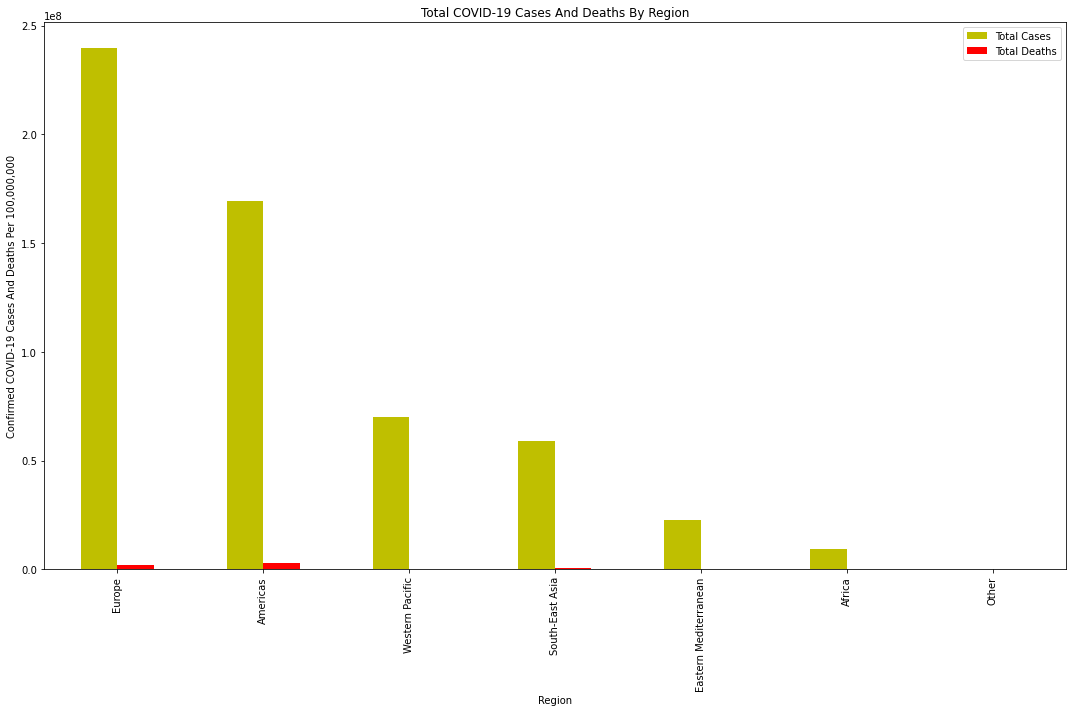

In [58]:
colors = ["y", "r"]
regions.plot(kind="bar", color = colors, figsize=(15,10))
plt.title("Total COVID-19 Cases And Deaths By Region")
# Set x and y limits

plt.xlabel("Region")
plt.ylabel("Confirmed COVID-19 Cases And Deaths Per 100,000,000")

plt.tight_layout()
plt.savefig("figures/CasesDeathsByRegion.png")
plt.show

In [59]:
final_data = pd.merge(left = timeline_df, right = WHO_global_data_df_transformed, how = "left", on = ['country', "date"] )
final_data.tail(10)


,country,date,confirmed_cases,confirmed_deaths,population,region,total_cases,cases_in_last_7days,cases_in_last_24hrs,total_deaths,deaths_in_last_7days,deaths_in_last_24hrs
41390,Uruguay,6/29/22,957629,7331,3473727.0,Americas,969803.0,1995.0,0.0,7403.0,16.0,0.0
41391,Uzbekistan,6/29/22,240667,1637,33469199.0,Europe,242879.0,442.0,68.0,1637.0,0.0,0.0
41392,Vanuatu,6/29/22,11266,14,307150.0,Western Pacific,11720.0,0.0,0.0,14.0,0.0,0.0
41393,Holy See,6/29/22,29,0,809.0,Europe,26.0,0.0,0.0,0.0,0.0,0.0
41394,Venezuela,6/29/22,526022,5732,28435943.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41395,Vietnam,6/29/22,10745631,43087,97338583.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41396,Wallis and Futuna,6/29/22,454,7,11246.0,Western Pacific,761.0,228.0,174.0,7.0,0.0,0.0
41397,Yemen,6/29/22,11824,2149,29825968.0,Eastern Mediterranean,11849.0,0.0,0.0,2149.0,0.0,0.0
41398,Zambia,6/29/22,325498,4003,18383956.0,Africa,329483.0,933.0,0.0,4015.0,2.0,0.0
41399,Zimbabwe,6/29/22,255520,5553,14862927.0,Africa,256284.0,97.0,0.0,5574.0,6.0,0.0


In [60]:
final_data.to_csv('../merged_data.csv')